In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
from sklearn.utils import resample
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

In [62]:
data1= pd.read_csv('measurements.csv')

In [63]:
data2=pd.read_excel('measurements2.xlsx')

In [64]:
for x in data1.columns:
    print(x, data1[x].isna().sum())

distance 0
consume 0
speed 0
temp_inside 12
temp_outside 0
specials 295
gas_type 0
AC 0
rain 0
sun 0
refill liters 375
refill gas 375


In [65]:
for x in data2.columns:
    print(x, data2[x].isna().sum())

distance 0
consume 0
speed 0
temp_inside 12
temp_outside 0
specials 295
gas_type 0
AC 0
rain 0
sun 0
refill liters 375
refill gas 375


In [6]:
data1.shape

(388, 12)

In [66]:
data2.shape

(388, 12)

In [67]:
data2[data2['refill gas'].isna()==False]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10,NaN,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1,NaN,SP98,0,0,0,45.0,SP98
139,16.1,5.4,24,21.5,7,rain,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8,NaN,E10,0,0,0,38.3,E10
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4,NaN,SP98,0,0,0,39.0,SP98
234,19.0,4.5,29,22.5,10,NaN,E10,0,0,0,39.0,E10
274,25.7,4.9,50,22.0,10,rain,SP98,0,1,0,41.0,SP98


In [68]:
data2.drop(['refill gas','refill liters'], axis=1, inplace=True)

In [69]:
for x in data2.columns:
    print(x, data1[x].isna().sum())

distance 0
consume 0
speed 0
temp_inside 12
temp_outside 0
specials 295
gas_type 0
AC 0
rain 0
sun 0


In [70]:
data2.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [71]:
data2.drop('specials', axis=1, inplace=True)

In [72]:
data2[data1.temp_inside.isna() == True]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
93,12.4,4.7,43,NaN,10,SP98,0,0,0
95,11.8,5.3,52,NaN,11,SP98,0,0,0
97,15.7,5.3,33,NaN,9,SP98,0,0,0
98,12.9,5.7,35,NaN,9,SP98,0,0,0
99,6.4,4.4,37,NaN,10,SP98,0,0,0
100,5.3,4.1,34,NaN,9,SP98,0,0,0
102,18.8,5.0,62,NaN,9,SP98,0,1,0
201,22.2,3.8,42,NaN,15,SP98,0,0,0
203,12.6,4.1,33,NaN,17,SP98,0,0,0
261,24.5,3.9,50,NaN,15,E10,0,0,1


In [73]:
lower = data2[data2.temp_outside < 15]
higher = data2[data2.temp_outside >= 15]
lower = lower[lower['temp_inside'].notna()]
higher = higher[higher['temp_inside'].notna()]

In [75]:
lower['temp_inside']=lower['temp_inside'].astype(np.number)
higher['temp_inside']= higher['temp_inside'].astype(np.number)

In [76]:
#no significative difference
print(lower['temp_inside'].mean())
print(higher['temp_inside'].mean())

21.68199233716475
22.491304347826087


In [78]:
data2['temp_inside'].fillna((data2['temp_inside'].mean()), inplace=True)

In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [81]:
data2['temp_dif'] = data2['temp_inside'] - data2['temp_outside']

In [83]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_dif
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5


In [86]:
data2['avg_cons'] = (data2['distance']*data2['consume'])/100

In [85]:
data2['avg_time'] = data2['distance']/data2['speed']

In [87]:
data2.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [116]:
url1 = "https://www.globalpetrolprices.com/Spain/gasoline_prices/"
response = requests.get(url1)
response.status_code
soup = BeautifulSoup(response.content, "html.parser")

200

In [125]:
a = soup.select("#graphPageLeft > table > tbody > tr:nth-child(1) > td:nth-child(2)")

In [132]:
e10_price = float(a[0].get_text())

In [141]:
url2 = "https://es.fuelo.net/fuel/type/gasoline98/2years?lang=en"
response = requests.get(url2)
response.status_code
soup = BeautifulSoup(response.content, "html.parser")

In [144]:
b = soup.select("body > div.page-wrapper > div.container > div:nth-child(2) > div.content.col-sm-8.col-md-8 > div:nth-child(2) > div.col-sm-3 > h2")

In [153]:
sp98_price = b[0].get_text()
sp98_price = sp98_price[:5]
sp98_price = sp98_price.replace(',','.')
sp98_price = float(sp98_price)

1.94

In [155]:
data2.loc[data2['gas_type'] == 'SP98', 'trip_cost'] = sp98_price*data2['avg_cons']
data2.loc[data2['gas_type'] == 'E10', 'trip_cost'] = e10_price*data2['avg_cons']

In [156]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_dif,avg_cons,avg_time,trip_cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,1.076923,2.501800
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.400000,0.900648
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,0.294737,1.100792
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.358333,0.899040
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,0.402174,1.487677


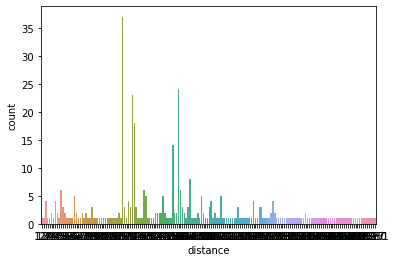

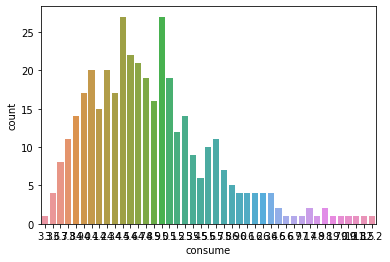

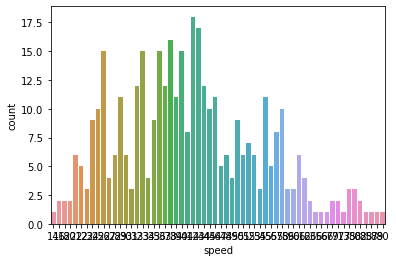

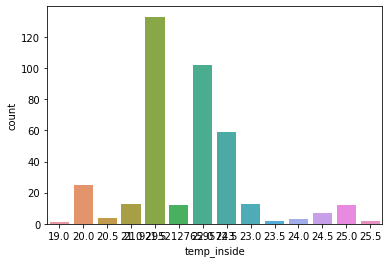

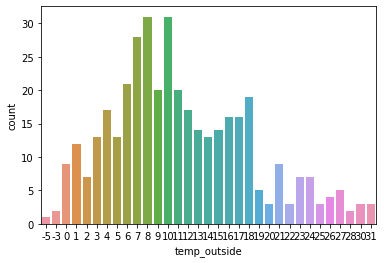

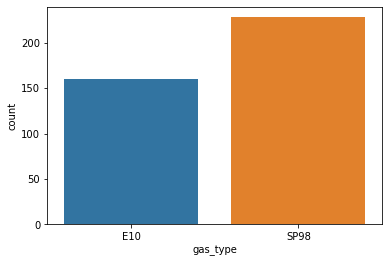

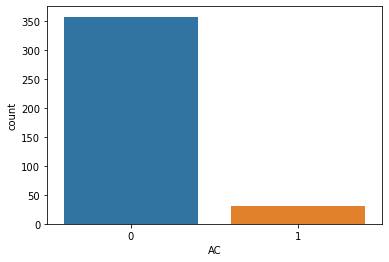

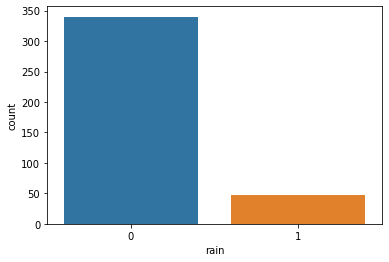

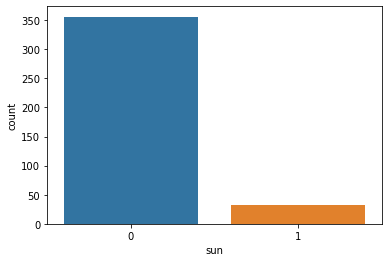

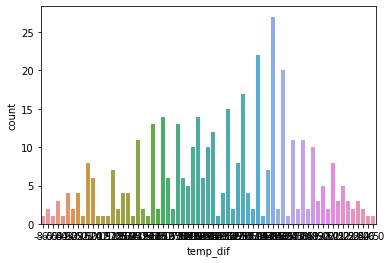

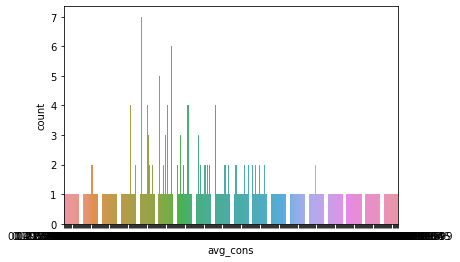

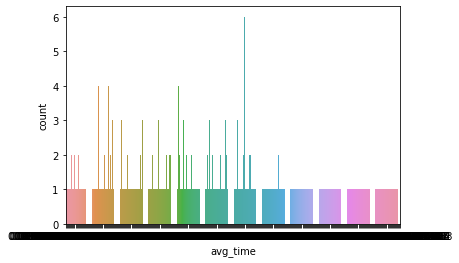

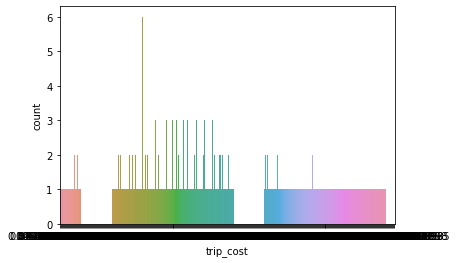

In [157]:
for x in data2.columns:
    sns.countplot(x=data2[x])
    plt.show()

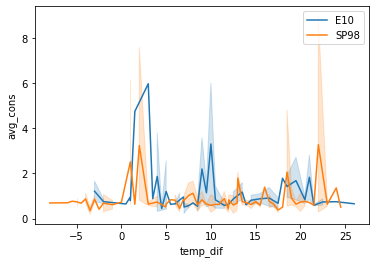

In [158]:
e10 = data2[data2.gas_type=='E10']
sp98 = data2[data2.gas_type=='SP98']

ax1 = sns.lineplot(data=e10, x=e10["temp_dif"], y=e10["avg_cons"], label = 'E10')
ax2 = sns.lineplot(data=sp98, x=sp98["temp_dif"], y=sp98["avg_cons"], label = 'SP98')
plt.legend()
plt.show()

In [159]:
#looks like when the temperature difference is lower than 5 or around 10, the consumption is higher for e10 vehicles
#and the overall consumpiton on sp98 is lower though the different temperatures

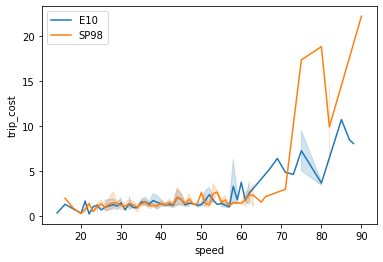

In [160]:
ax1 = sns.lineplot(data=e10, x=e10["speed"], y=e10["trip_cost"], label = 'E10')
ax2 = sns.lineplot(data=sp98, x=sp98["speed"], y=sp98["trip_cost"], label = 'SP98')
plt.legend()
plt.show()

In [161]:
#e10, at higher speeds (>70), have lower trip costs
#between 50 to 70, e10 vehicles trips tend to higher
#at lower speeds, the costs look pretty the same

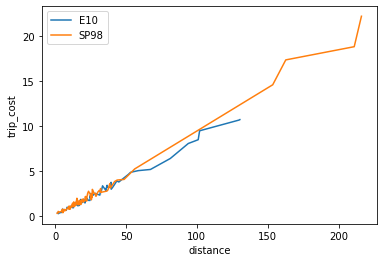

In [162]:
ax1 = sns.lineplot(data=e10, x=e10["distance"], y=e10["trip_cost"], label = 'E10')
ax2 = sns.lineplot(data=sp98, x=sp98["distance"], y=sp98["trip_cost"], label = 'SP98')
plt.legend()
plt.show()

In [ ]:
#looks like, for longer trips, e10 is the best solution
#and there's no significant differences between types of fuel in lower distances

# since the price of the e10 is significantly lower than the sp98, I would recommend it as the one to be used, since the significant differences are always in favour of e10, being the sp98 the worst possibility (except for lower positive differences in temperatures (inside/outside), where, somehow, when the difference is small, but positve, e10 tens do consume more)

# H0 ----> the cost of e10 or sp98 trips are the same
# H1 ----> the cost of e10 or sp98 trips are different

In [164]:
stat, pval = ttest_ind(data2[data2['gas_type'] == 'E10'].trip_cost,data2[data2['gas_type'] == 'SP98'].trip_cost)
print(pval)
print(stat)

0.6842300813253701
0.4070047675120243


# The p-value is way over 0.05 so we FAIL TO REJECT THE NULL, meaning the trips costs of the different vehicles almost the same

In [175]:
data2.gas_type.value_counts()

1    228
0    160
Name: gas_type, dtype: int64

<AxesSubplot:>

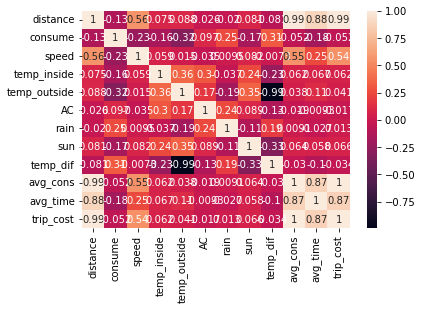

In [167]:
import seaborn as sns
correl_matrix_cont = data2.corr()
sns.heatmap(correl_matrix_cont,annot=True)

In [226]:
data2.loc[data2['gas_type'] == 'SP98', 'gas_type'] = 1
data2.loc[data2['gas_type'] == 'E10', 'gas_type'] = 0

In [227]:
data2.drop(['avg_cons','trip_cost'], axis=1, inplace=True)

KeyError: "['avg_cons', 'trip_cost'] not found in axis"

In [229]:
X = data2.drop('gas_type',axis=1)
y = data2['gas_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [230]:
imbalance = pd.concat([X_train,y_train],axis=1)

In [231]:
SP98 = imbalance[imbalance['gas_type'] == 1]
E10 = imbalance[imbalance['gas_type'] == 0]

In [232]:
E10_oversampled = resample(E10,replace=True,n_samples = len(SP98),random_state=0)

In [233]:
display(SP98.shape)
display(E10_oversampled.shape)

(183, 11)

(183, 11)

In [234]:
imbalance = pd.concat([E10_oversampled,SP98],axis=0)
imbalance = imbalance.sample(frac=1)

In [235]:
y_train = imbalance['gas_type']
X_train = imbalance.drop('gas_type',axis = 1)

In [236]:
X_train.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'temp_dif', 'avg_time'],
      dtype='object')

In [237]:
x_train_numerical = X_train.select_dtypes(np.number)

x_test_numerical = X_test.select_dtypes(np.number)


In [238]:
transformer = MinMaxScaler().fit(x_train_numerical)
normalized = transformer.transform(x_train_numerical)
normalized_x_train = pd.DataFrame(normalized,columns=x_train_numerical.columns)

In [239]:
normalized = transformer.transform(x_test_numerical)
normalized_x_test = pd.DataFrame(normalized,columns=x_test_numerical.columns)

In [240]:
X_train = normalized_x_train
X_test = normalized_x_test

In [247]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [244]:

X_test.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,temp_dif,avg_time
0,0.976257,0.158537,0.868421,0.461538,0.694444,0.0,0.0,0.0,0.294118,1.101055
1,0.048883,0.146341,0.315789,0.384615,0.277778,0.0,1.0,0.0,0.720588,0.106285
2,0.016294,0.170732,0.157895,0.923077,0.638889,0.0,0.0,0.0,0.441176,0.052458
3,0.048883,0.158537,0.342105,0.538462,0.194444,0.0,0.0,0.0,0.838235,0.099647
4,0.173184,0.182927,0.644737,0.384615,0.527778,0.0,0.0,0.0,0.455882,0.234783


In [248]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [249]:
print("test data accuracy was ",model.score(X_test,y_test))

print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.6666666666666666
train data accuracy was  0.860655737704918


In [250]:
max_depth = range(1,15)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

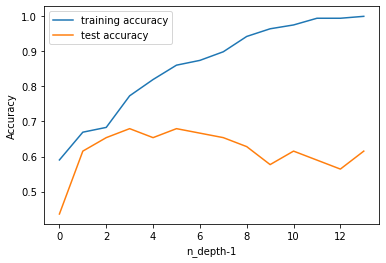

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

In [254]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [255]:
print("test data accuracy was ",model.score(X_test,y_test))

print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.6538461538461539
train data accuracy was  0.6830601092896175


In [259]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [261]:
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.6666666666666666


In [263]:
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)

KNeighborsRegressor()

In [265]:
print (KNR.score(X_train, y_train))
print(KNR.score(X_test, y_test))

0.447431693989071
-0.2206868686868686


# Conclusions

Looking through the data, I've realized that, using today's prices (I did some web scraping), there's no much of a difference between those two fuels:
    Looks like when the temperature difference is lower than 5 or around 10, the consumption is higher for e10 vehicles. And the overall consumpiton on sp98 is lower though the different temperatures;
    E10, at higher speeds (>70), have lower trip costs. Between 50 to 70, e10 vehicles trips tend to higher
At lower speeds, the costs look pretty the same;
    Looks like, for longer trips, e10 is the best solution
    And there's no significant differences between types of fuel in lower distances

The trips costs of the different vehicles almost the same

With more time, I would like to do a analysis using the price of electricity and a model to predict the costs of using that kind of vehicle.

I've created 3 different models, to predict the type of fuel a car uses, by looking into the others available features. Using the decision tree regressor and the random forest classifier, I was able to guess the type of fuel used 66% of the time.